# Лабораторна робота 6
Михайло Корешков ФІ-91, Варіант 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$y' = (1-x^2)y + F(x)$

$y = \tan x$

---

$y' = \frac{1}{\cos^2 x} = (1-x^2)\tan x + F(x)$

$F(x) = \frac{1}{\cos^2 x} + (x^2-1)\tan x$

$y' = (1-x^2)y + \frac{1}{\cos^2 x} + (x^2-1)\frac{\sin x}{\cos x} = 
(1-x^2)(y - \tan x) + \frac{1}{\cos^2 x}$

---

Тобто
$\begin{cases}
y' &= (1-x^2)(y - \tan x) + \frac{1}{\cos^2 x} = f(x,y) \\
y(0) &= 0 = \tan 0
\end{cases}$

In [2]:
def F(x,y):
    return (1-x*x)*(y - np.tan(x)) + 1/(np.square(np.cos(x)))

def true_y(x):
    return np.tan(x)

In [3]:
H = 0.1
Y0 = 0
T = 1.5
X = np.arange(0.0, T+H, H)
Nt = X.shape[0]

In [4]:
true_solution = true_y(X)

## Метод Ойлера

Просто $y_{k+1} = y_k + h \cdot f(x_k, y_k); \quad x_{k+1} = x_k + h$

In [5]:
def SimpleEuler(y0, f, h, nt):
    print(f"Starting euler solver with y(0)={y0}, h={h}, nt={nt}, T={nt*h:.2f}")
    
    Y = np.zeros(nt)
    Y[0] = y0
    t = 0
    y = y0
    
    for n in range(1, nt):
        # print(f"calculating n={n}, t={t}, y={y}")
        y = y + h * f(t, y)
        t = t + h
        Y[n] = y
        
    return Y

Starting euler solver with y(0)=0, h=0.1, nt=16, T=1.60


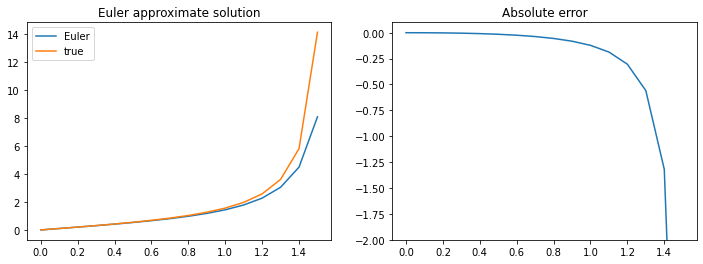

In [6]:
euler_solution = SimpleEuler(Y0, F, H, Nt)
euler_error = euler_solution - true_solution

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(X, euler_solution, label="Euler")
ax1.plot(X, true_solution, label="true")
ax1.set_title("Euler approximate solution")
ax1.legend()
ax2.plot(X, euler_error, label="absolute error")
ax2.set_title("Absolute error")
ax2.set_ylim(-2,0.1)
fig.set_size_inches((12,4))

In [7]:
print("Max Euler error = ", np.abs(euler_error).max())
print("Max Euler relative error = ", np.abs(euler_error[1:] / true_solution[1:]).max())

Max Euler error =  6.034183396858424
Max Euler relative error =  0.42791317608186563


> Маємо непогане наближення, що розбігається тим сильніше, чим далі від початкового моменту часу

## Метод Рунге-Кутта 4-го порядку

![rk1.png](rk1.png)

In [8]:
def RungeKutta(y0, f, h, nt):
    print(f"Starting runge-kutta solver with y(0)={y0}, h={h}, nt={nt}, T={nt*h:.2f}")
    
    Y = np.zeros(nt)
    Y[0] = y0
    t = 0
    y = y0
    
    for n in range(1, nt):
        # print(f"calculating n={n}, t={t}, y={y}")
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h  , y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4)/6
        t = t + h
        Y[n] = y
        
    return Y

Starting runge-kutta solver with y(0)=0, h=0.1, nt=16, T=1.60


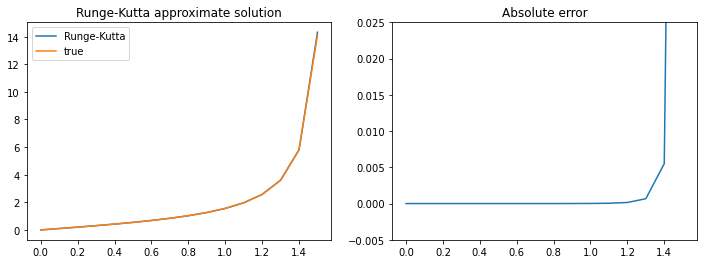

In [9]:
runge_kutta_solution = RungeKutta(Y0, F, H, Nt)
runge_kutta_error = runge_kutta_solution - true_solution

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(X, runge_kutta_solution, label="Runge-Kutta")
ax1.plot(X, true_solution, label="true")
ax1.set_title("Runge-Kutta approximate solution")
ax1.legend()
ax2.plot(X, runge_kutta_error, label="absolute error")
ax2.set_title("Absolute error")
ax2.set_ylim(-0.005, 0.025)
fig.set_size_inches((12,4))

In [10]:
print("Max Runge-Kutta error = ", np.abs(runge_kutta_error).max())
print("Max Runge-Kutta relative error = ", np.abs(runge_kutta_error[1:] / true_solution[1:]).max())

Max Runge-Kutta error =  0.21991786959170945
Max Runge-Kutta relative error =  0.015595441481467102


> Маємо гарний розв'язок та малу похибку, доки розв'язок не починає зростати стрімко

## Метод Адамса-Башфорта

По-перше, цей метод є багатокроковим. Тобто, для прогнозування наступного значення шуканої функції він використовує не лише попереднє, а й попередні до нього. А саме, наступне значення ми екстраполюємо поліномом, що проходить через m попередніх точок.

Перші m точок знаходимо іншим способом

### Метод Адамса-Башфорта з кубічним поліномом (m=4)
$y_{k+1} = y_k + h \cdot (55f_k - 59f_{k-1} + 37f_{k-2} - 9f_{k-3}) / 24$

In [11]:
def AdamBashforth4(y0, f, h, nt):
    print(f"Starting adams-bashforth solver with y(0)={y0}, h={h}, nt={nt}, T={nt*h:.2f}")
    
    Y = np.zeros(nt)
    Y[0] = y0
    t = 0
    y = y0
    
    # last f values (k-3, k-2, k-1, k)
    fs = [0, 0, 0, 0]
    def pushF(a):
        fs[0], fs[1], fs[2], fs[3] = fs[1], fs[2], fs[3], a
    
    pushF(f(0, y0))
    
    # Prepare with Runge-Kutta
    for n in range(1, 3):
        # print(f"calculating n={n}, t={t}, y={y}")
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h  , y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4)/6
        t = t + h
        Y[n] = y
        pushF(f(t,y))
        
    # Start Adams-Bashforth
    for n in range(3, nt):
        pushF(f(t, y))
        y = y + h * ( 55*fs[-1] - 59*fs[-2] + 37*fs[-3] - 9*fs[-4] ) / 24
        t = t + h
        Y[n] = y
        
    return Y

Starting adams-bashforth solver with y(0)=0, h=0.1, nt=16, T=1.60


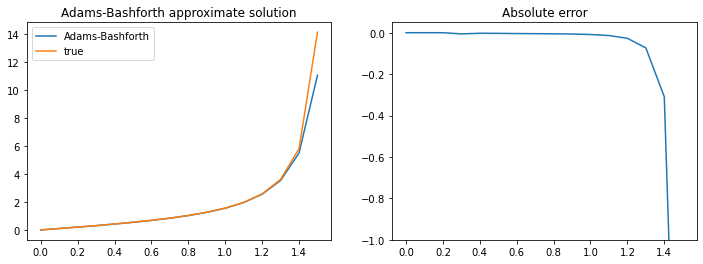

In [12]:
adams_bashforth_solution = AdamBashforth4(Y0, F, H, Nt)
adams_bashforth_error = adams_bashforth_solution - true_solution

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(X, adams_bashforth_solution, label="Adams-Bashforth")
ax1.plot(X, true_solution, label="true")
ax1.set_title("Adams-Bashforth approximate solution")
ax1.legend()
ax2.plot(X, adams_bashforth_error, label="absolute error")
ax2.set_title("Absolute error")
ax2.set_ylim(-1.0, 0.05)
fig.set_size_inches((12,4))

In [13]:
print("Max Adams-Bashforth error = ", np.abs(runge_kutta_error).max())
print("Max Adams-Bashforth relative error = ", np.abs(runge_kutta_error[1:] / true_solution[1:]).max())

Max Adams-Bashforth error =  0.21991786959170945
Max Adams-Bashforth relative error =  0.015595441481467102


> Маємо гарний розв'язок та малу похибку, доки розв'язок не починає зростати стрімко. Метод працює гірше за Рунге-Кутта

## Спільний графік

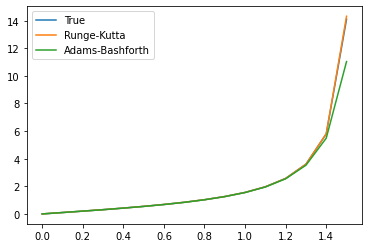

In [14]:
plt.plot(X, true_solution, label="True")
plt.plot(X, runge_kutta_solution, label="Runge-Kutta")
plt.plot(X, adams_bashforth_solution, label="Adams-Bashforth")
plt.legend()

(4.0, 15.0)

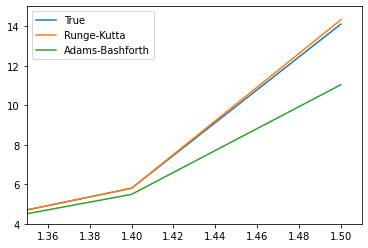

In [15]:
plt.plot(X, true_solution, label="True")
plt.plot(X, runge_kutta_solution, label="Runge-Kutta")
plt.plot(X, adams_bashforth_solution, label="Adams-Bashforth")
plt.legend()
plt.xlim(1.35, 1.51)
plt.ylim(4, 15)